
## Install dependencies ##
---



In [1]:
!pip install pymatreader
!pip install mne
!pip install antropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 42.9 MB/s eta 0:00:00


In [ ]:
import mne
import numpy as np
import pandas as pd
import antropy as ant
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os.path as op


In [71]:
raw = mne.read_epochs_eeglab("/content/AJJ_CE_FINAL REJECTED.set")

Extracting parameters from /content/AJJ_CE_FINAL REJECTED.set...
Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-71-c5eba597bdd0>:2: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  raw = mne.read_epochs_eeglab("/content/AJJ_CE_FINAL REJECTED.set")


## TWO CHANNELS GIF OF EEG SIGNAL ##

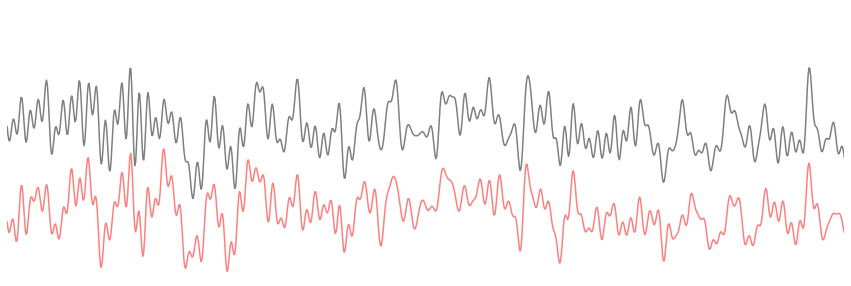

In [9]:
signal1 = raw.get_data()[:,2,:]  # signal1 contains all epochs in a given channel (O1) in this case
signal2 = raw.get_data()[:,3,:]  # signal2 contains all epochs in a given channel (O2) in this case

# Scaling factor (greater number, smaller signal)
scale_factor = 5

# sampling frequency of the signal
fs = 512

# total signal time
total_time = signal1.shape[1] / fs

# time vector in seconds
time = np.linspace(0, total_time, signal1.shape[1])

# Create and set axis
fig, ax = plt.subplots(figsize=(15, 5), facecolor='none')

# Define update function (which update each frame of the gif)
def update(epoch):
    ax.clear()
    ax.plot(time, signal1[epoch] * scale_factor, 'k-', alpha=0.5)
    ax.plot(time, signal2[epoch] * scale_factor - np.max(signal1) - 5e-05, 'r-', alpha=0.5)  # - 5e-05 represents the offset of the signal2 with respect of signal1
    ax.axis('off')
    ax.set_xlim([0, total_time])
    ax.set_ylim([np.min(signal1) * scale_factor - 5e-05, np.max(signal2) * scale_factor + 3e-05])

# Create animation
ani = FuncAnimation(fig, update, frames=signal1.shape[0], interval=100)

# Save .gif file
ani.save("signals.gif", writer='pillow')


## Gif spectrum per epoch ##

    Using multitaper spectrum estimation with 7 DPSS windows


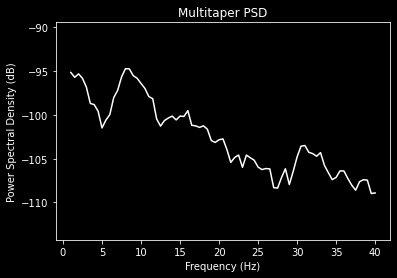

In [159]:
epochs = raw
nepochs, nchannels, npoints = epochs.get_data().shape

f, ax = plt.subplots()
psds, freqs = mne.time_frequency.psd_array_multitaper(epochs.get_data()[2,2,:], fmin=1, fmax=40, n_jobs=-1, sfreq = epochs.info['sfreq'])
psds = 10 * np.log10(psds)  # convert to dB
psds_mean = psds
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='w')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')
plt.show()

Dark style

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

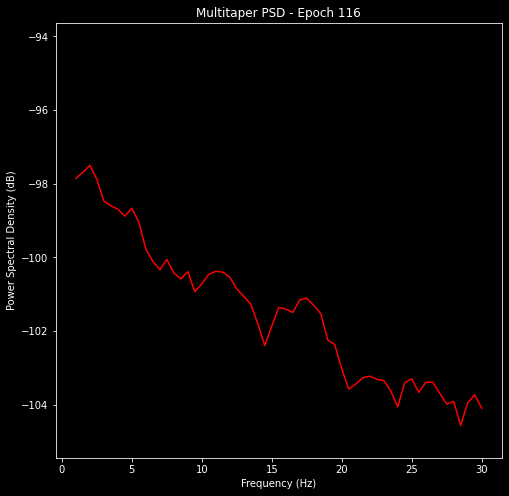

In [148]:
import matplotlib.animation as animation

nepochs, nchannels, npoints = epochs.get_data().shape

# Define PSD params
fmin, fmax = 1, 30
n_jobs = -1
sfreq = epochs.info['sfreq']

# create figure, axis and set dark theme
fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('dark_background')


# Create init line for the plot
psds_init, freqs = mne.time_frequency.psd_array_multitaper(epochs.get_data()[0, :, :], fmin=fmin, fmax=fmax, n_jobs=n_jobs, sfreq=sfreq)
psds_init = 10 * np.log10(psds_init)
psds_mean_init = psds_init.mean(0).flatten()
line, = ax.plot(freqs, psds_mean_init, color='r')

# Set the axis of the plot
ax.set(title=f'Multitaper PSD - Epoch 0', xlabel='Frequency (Hz)', ylabel='Power Spectral Density (dB)')

frames = []
for epoch_idx in range(len(epochs)):
    # Get the PSD per epoch
    psds, freqs = mne.time_frequency.psd_array_multitaper(epochs.get_data()[epoch_idx, :, :], fmin=fmin, fmax=fmax, n_jobs=n_jobs, sfreq=sfreq)
    psds = 10 * np.log10(psds)  # convert to dB
    psds_mean = psds.mean(0).flatten()

    # save line2d object in a list
    frames.append([line])

def update_data(epoch_idx):
    # update line values with the respective PSD of each epoch
    psds, _ = mne.time_frequency.psd_array_multitaper(epochs.get_data()[epoch_idx, :, :], fmin=fmin, fmax=fmax, n_jobs=n_jobs, sfreq=sfreq)
    psds = 10 * np.log10(psds)  # convert to dB
    psds_mean = psds.mean(0).flatten()
    line.set_data(freqs, psds_mean)

    # update title with epochs (running number of epochs in title)
    ax.set_title(f'Multitaper PSD - Epoch {epoch_idx}')
    
    return [line]

try:
    # Create animation
    ani = animation.FuncAnimation(fig, update_data, frames=len(epochs), interval=100, blit=True)

    # Save .gif file
    ani.save('psd_animation.gif', writer='pillow')
except:
    pass



Cubehelix changing colors

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

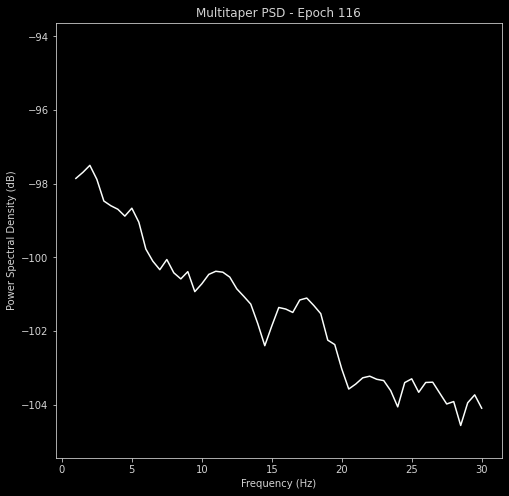

In [149]:
import matplotlib.animation as animation
import matplotlib.cm as cm

nepochs, nchannels, npoints = epochs.get_data().shape

# define PSD params
fmin, fmax = 1, 30
n_jobs = -1
sfreq = epochs.info['sfreq']

# Create fig and axis, set dark theme
fig, ax = plt.subplots(figsize=(8, 8))
plt.style.use('dark_background')

# Create init line for the plot
psds_init, freqs = mne.time_frequency.psd_array_multitaper(epochs.get_data()[0, :, :], fmin=fmin, fmax=fmax, n_jobs=n_jobs, sfreq=sfreq)
psds_init = 10 * np.log10(psds_init)
psds_mean_init = psds_init.mean(0).flatten()
line, = ax.plot(freqs, psds_mean_init, color='k')

# Set the axis and title
ax.set(title=f'Multitaper PSD - Epoch 0', xlabel='Frequency (Hz)', ylabel='Power Spectral Density (dB)')

# Light gray colors 
ax.spines['top'].set_edgecolor('lightgray')
ax.spines['right'].set_edgecolor('lightgray')
ax.spines['bottom'].set_edgecolor('lightgray')
ax.spines['left'].set_edgecolor('lightgray')
ax.xaxis.label.set_color('lightgray')
ax.yaxis.label.set_color('lightgray')
ax.title.set_color('lightgray')
ax.tick_params(axis='both', colors='lightgrey')

frames = []
for epoch_idx in range(len(epochs)):
    # Get the PSD of each epoch
    psds, freqs = mne.time_frequency.psd_array_multitaper(epochs.get_data()[epoch_idx, :, :], fmin=fmin, fmax=fmax, n_jobs=n_jobs, sfreq=sfreq)
    psds = 10 * np.log10(psds)  # convert to dB
    psds_mean = psds.mean(0).flatten()

    # save Line2D object in a list
    frames.append([line])

def update_data(epoch_idx):
    # update line2d values based on current epoch
    psds, _ = mne.time_frequency.psd_array_multitaper(epochs.get_data()[epoch_idx, :, :], fmin=fmin, fmax=fmax, n_jobs=n_jobs, sfreq=sfreq)
    psds = 10 * np.log10(psds)  # convert to dB
    psds_mean = psds.mean(0).flatten()
    line.set_data(freqs, psds_mean)

    # update title with epoch number
    ax.set_title(f'Multitaper PSD - Epoch {epoch_idx}')
    
    # use cubehelix palette
    color = cm.cubehelix(epoch_idx/len(epochs))
    line.set_color(color)

    return [line]

try:
    # Create animation
    ani = animation.FuncAnimation(fig, update_data, frames=len(epochs), interval=100, blit=True)

    # save GIF
    ani.save('psd_animation_color.gif', writer='pillow')
except:
    pass


### ENTROPY PLOTS ###

In [150]:
eegs = ["/content/AJJ_CE_FINAL REJECTED.set"]
dict_list = []

for eeg_file in eegs: #read and preload dataset
    epochs = mne.read_epochs_eeglab(eeg_file)
    nepochs,nchannels,npoints = epochs._data.shape
    correct_channels = epochs.info['ch_names']
    epochs.reorder_channels(correct_channels)
    channels = epochs.info['ch_names']
    sf = epochs.info['sfreq']
    for ch,ch_label in enumerate(channels):
        for ep in range(nepochs):
            features = {}
            features['channel'] = ch_label
            features['epoch'] = ep
            features['permutation'] = ant.perm_entropy(epochs.get_data()[ep,ch,:], normalize=True)
            dict_list.append(features)
entropies = pd.DataFrame(dict_list)


Extracting parameters from /content/AJJ_CE_FINAL REJECTED.set...
Not setting metadata
117 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-150-9801bc291e9e>:5: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(eeg_file)


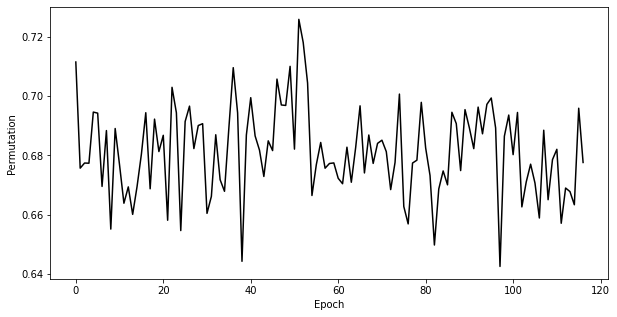

In [90]:
# create a time vector for the epochs
permutation_values = entropies.loc[entropies['channel'] == 'O2', 'permutation'].values
epoch_time = np.arange(len(permutation_values))

# Create fig and axis
fig, ax = plt.subplots(figsize=(10, 5), facecolor='none')

# Plot permutation entropy as a function of epochs
ax.plot(epoch_time, permutation_values, 'k-')

# ax labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Permutation')

# show all epochs
plt.show()

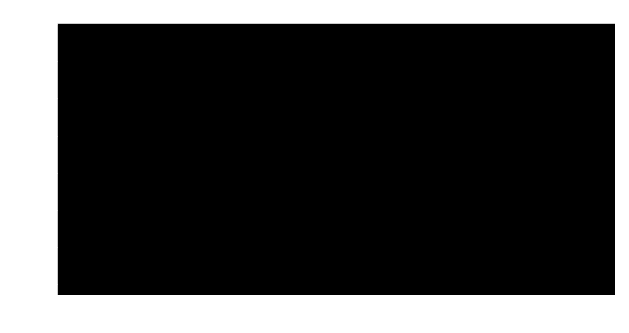

In [153]:
# create a time vector for the epochs
permutation_values = entropies.loc[entropies['channel'] == 'O2', 'permutation'].values
epoch_time = np.arange(len(permutation_values))

# Create fig and axis
fig, ax = plt.subplots(figsize=(10, 5), facecolor='none')
plt.style.use('dark_background')


# Define update function to update each frame of the gif
def update(frame):
    ax.clear()
    ax.plot(epoch_time[:frame+1], permutation_values[:frame+1], 'white')
    ax.set_xlim([max(0, frame-4), frame+1])
    ax.set_ylim([np.min(permutation_values) - 0.05, np.max(permutation_values) + 0.05])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Permutation')
    ax.set_title(f'Epochs {max(0, frame-4)} - {frame}')

# Create animation
ani = FuncAnimation(fig, update, frames=len(permutation_values), interval=200)

# save GIF
ani.save('permutation_animation.gif', writer='pillow')


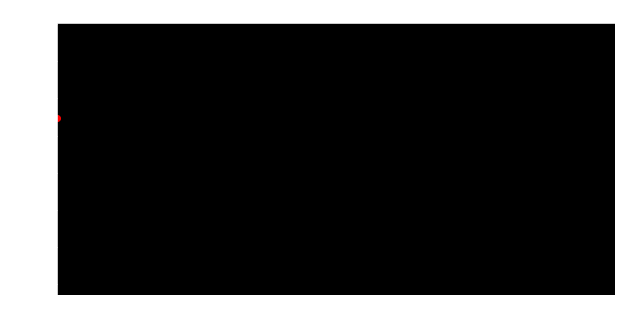

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# create a time vector for the epochs
permutation_values = entropies.loc[entropies['channel'] == 'O2', 'permutation'].values
epoch_time = np.arange(len(permutation_values))

# Create fig and axis
fig, ax = plt.subplots(figsize=(10, 5), facecolor='none')
plt.style.use('dark_background')


# Define update function to update each frame of the gif
def update(frame):
    ax.clear()
    ax.scatter(epoch_time[:frame+1], permutation_values[:frame+1], color='red')
    ax.set_xlim([0, len(epoch_time)])
    ax.set_ylim([np.min(permutation_values) - 0.05, np.max(permutation_values) + 0.05])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Permutation')
    ax.set_title(f'Epochs 0 - {frame}')

# Create animation
ani = FuncAnimation(fig, update, frames=len(permutation_values), interval=200)

# save GIF
ani.save('permutation_scatter.gif', writer='pillow')


Dark Style 1 point

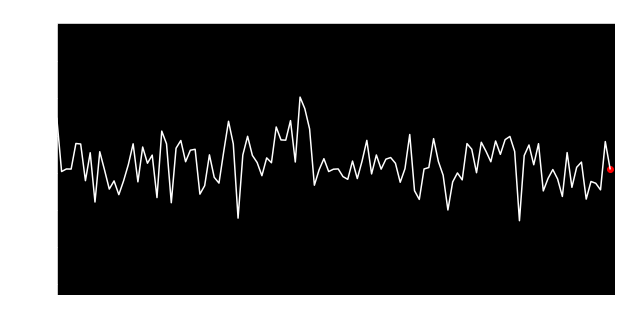

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# create a time vector for the epochs
permutation_values = entropies.loc[entropies['channel'] == 'O2', 'permutation'].values
epoch_time = np.arange(len(permutation_values))

# create fig and axis
fig, ax = plt.subplots(figsize=(10, 5), facecolor='none')
plt.style.use('dark_background')


# define init params of the figure
def init():
    ax.set_xlim([0, len(permutation_values)])
    ax.set_ylim([np.min(permutation_values) - 0.05, np.max(permutation_values) + 0.05])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Permutation')
    ax.set_title('Permutation over time')

    # Create initial line with 1 data-point
    line, = ax.plot(epoch_time[:1], permutation_values[:1], 'k-')

    # Create the group of datapoints of the line
    points = [(epoch_time[0], permutation_values[0])]

    return line,




# define an empty list of datapoints
points = []

# Define update function to update each frame of the gif
def update(frame):
    # get x, y coordenates for each point
    x = epoch_time[frame]
    y = permutation_values[frame]
    
    # add new point to the list of points
    points.append((x, y))
    
    # Create a separate list of x, y coordinates
    x_list, y_list = zip(*points)
    
    # plot points and join them with a line
    ax.clear()
    ax.plot(x_list, y_list, 'white')
    ax.scatter(x, y, c='r')
    ax.set_xlim([0, len(epoch_time)])
    ax.set_ylim([np.min(permutation_values) - 0.05, np.max(permutation_values) + 0.05])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Permutation')
    ax.set_title(f'Epochs 0 - {frame}')

    

    # update line with new point
    line.set_data(zip(*points))

    # adjust limits of x and y axis
    ax.set_xlim([max(0, frame-4), frame+1])

    return line,

# Create gif
ani = FuncAnimation(fig, update, frames=len(permutation_values), init_func=init, interval=200)

# save gif
ani.save('permutation_line.gif', writer='pillow')





Dark style (many points)

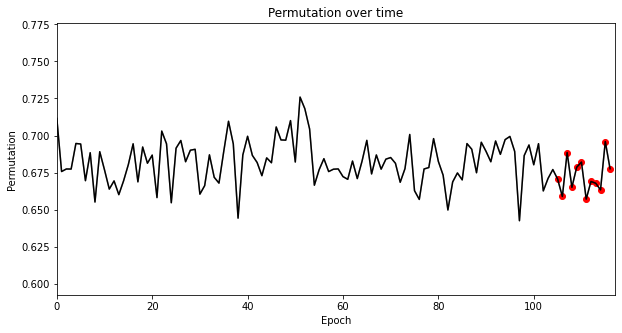

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# create a time vector for the epochs
permutation_values = entropies.loc[entropies['channel'] == 'O2', 'permutation'].values
epoch_time = np.arange(len(permutation_values))

# create fig and axis
fig, ax = plt.subplots(figsize=(10, 5), facecolor='none')

# define init params of the figure
def init():
    ax.set_xlim([0, len(permutation_values)])
    ax.set_ylim([np.min(permutation_values) - 0.05, np.max(permutation_values) + 0.05])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Permutation')
    ax.set_title('Permutation over time')

    # Create initial line with 1 data-point
    line, = ax.plot(epoch_time[:1], permutation_values[:1], 'k-')

    # Create the group of datapoints of the line
    points = [(epoch_time[0], permutation_values[0])]

    return line,

# define an empty list of datapoints
points = []

# Define the number of epochs to plot in each frame
epochs_per_frame = 15

# Define the update function 
def update(frame):
    # Obtain index of last epoch
    end_index = min((frame + 1) * epochs_per_frame, len(permutation_values))
    
    # get x, y coordenates for each point in this frame
    x = epoch_time[frame * epochs_per_frame:end_index]
    y = permutation_values[frame * epochs_per_frame:end_index]
    
    # Add new points to data-points list
    points.extend(zip(x, y))
    
    # Plot and join points with line
    ax.clear()
    ax.plot(epoch_time[:end_index], permutation_values[:end_index], 'k-', alpha=0.3)
    ax.scatter(x, y, c='r')
    ax.plot(*zip(*points), 'k-')
    ax.set_xlim([0, len(epoch_time)])
    ax.set_ylim([np.min(permutation_values) - 0.05, np.max(permutation_values) + 0.05])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Permutation Entropy')
    ax.set_title(f'Epochs {end_index-16} - {end_index-1}')

    # update frame
    line.set_data(zip(*points))

    return line,

# Create gif
ani = FuncAnimation(fig, update, frames=int(np.ceil(len(permutation_values) / epochs_per_frame)), init_func=init, interval=200)

# save gif
ani.save('permutation_line.gif', writer='pillow')


Cubehelix colors

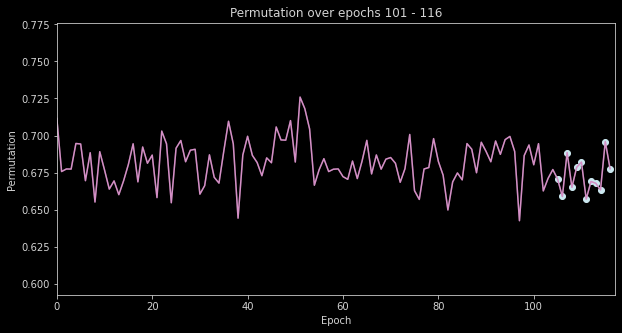

In [140]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.cm import cubehelix

# create a time vector for the epochs
permutation_values = entropies.loc[entropies['channel'] == 'O2', 'permutation'].values
epoch_time = np.arange(len(permutation_values))

# create fig and axis
fig, ax = plt.subplots(figsize=(10, 5), facecolor='black')
plt.style.use('dark_background')



# define init params of the figure
def init():
    ax.set_xlim([0, len(permutation_values)])
    ax.set_ylim([np.min(permutation_values) - 0.05, np.max(permutation_values) + 0.05])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Permutation')

    
    # lightgray all figure elements
    ax.spines['top'].set_edgecolor('lightgray')
    ax.spines['right'].set_edgecolor('lightgray')
    ax.spines['bottom'].set_edgecolor('lightgray')
    ax.spines['left'].set_edgecolor('lightgray')
    ax.xaxis.label.set_color('lightgray')
    ax.yaxis.label.set_color('lightgray')
    ax.title.set_color('lightgray')
    ax.tick_params(axis='both', colors='lightgrey')
    ax.set_facecolor('black')
    fig.set_facecolor('black')



    # Create initial line with 1 data-point
    line, = ax.plot(epoch_time[:1], permutation_values[:1], 'k-')

    # Create the group of datapoints of the line
    points = [(epoch_time[0], permutation_values[0])]

    return line,

# define an empty list of datapoints
points = []

# Define the number of epochs to plot in each frame
epochs_per_frame = 15

# Define the update function 
def update(frame, line):
    # Obtain index of last epoch
    end_index = min((frame + 1) * epochs_per_frame, len(permutation_values))
    
    # get x, y coordenates for each point in this frame
    x = epoch_time[frame * epochs_per_frame:end_index]
    y = permutation_values[frame * epochs_per_frame:end_index]
    
    # Add new points to data-points list
    points.extend(zip(x, y))
    
    # Plot and join points with line
    ax.clear()
    ax.plot(epoch_time[:end_index], permutation_values[:end_index], '#d38fc5', alpha=0.3)
    ax.scatter(x, y, color=cubehelix(frame/len(list(range(int(np.ceil(len(permutation_values) / epochs_per_frame)))))))
    ax.plot(*zip(*points), '#d38fc5')
    ax.set_xlim([0, len(epoch_time)])
    ax.set_ylim([np.min(permutation_values) - 0.05, np.max(permutation_values) + 0.05])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Permutation Entropy')
    ax.set_title(f'Permutation over epochs {end_index-16} - {end_index-1}')
    ax.set_facecolor('black')
    fig.set_facecolor('black')
    ax.title.set_color('lightgray')


    # update frame
    line.set_data(zip(*points))
    # Use cubehelix palette
    color = cubehelix(frame/len(list(range(int(np.ceil(len(permutation_values) / epochs_per_frame))))))
    line.set_color(color)


    return line,



# Create gif
ani = FuncAnimation(fig, update, frames=int(np.ceil(len(permutation_values) / epochs_per_frame)),
fargs=(line,), init_func=init, interval=200)

# Add legend
ax.legend()

# save GIF
ani.save('permutation_line.gif', writer='pillow')
